In [1]:
# first, import all the libs we need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium import plugins

%matplotlib inline

df = pd.read_csv("crimes.csv")

# Crime Categories

We are not interested in using all the data because there are certain types of crimes that are irrelevant to immediate danger to another person. The crime alert should only notify a citizen nearby when he could be physically hurt or have his personal properties taken.

We are going to check the crime categories and filter out the ones that are not useful to us. Below are the crime categories.

In [2]:
for c in df.Category.unique():
    print c

WARRANTS
OTHER OFFENSES
LARCENY/THEFT
VEHICLE THEFT
VANDALISM
NON-CRIMINAL
ROBBERY
ASSAULT
WEAPON LAWS
BURGLARY
SUSPICIOUS OCC
DRUNKENNESS
FORGERY/COUNTERFEITING
DRUG/NARCOTIC
STOLEN PROPERTY
SECONDARY CODES
TRESPASS
MISSING PERSON
FRAUD
KIDNAPPING
RUNAWAY
DRIVING UNDER THE INFLUENCE
SEX OFFENSES FORCIBLE
PROSTITUTION
DISORDERLY CONDUCT
ARSON
FAMILY OFFENSES
LIQUOR LAWS
BRIBERY
EMBEZZLEMENT
SUICIDE
LOITERING
SEX OFFENSES NON FORCIBLE
EXTORTION
GAMBLING
BAD CHECKS
TREA
RECOVERED VEHICLE
PORNOGRAPHY/OBSCENE MAT


In [3]:
# These are the (what I believe to be) relevant crime categories:
relevant_categories = [
  "LARCENY/THEFT",
  "VEHICLE THEFT",
  "ROBBERY",
  "ASSAULT",
  "WEAPON LAWS",
  "BURGLARY",
  "DRUNKENNESS",
  "DRUG/NARCOTIC",
  "KIDNAPPING",
  "DRIVING UNDER THE INFLUENCE",
  "SEX OFFENSES FORCIBLE",
  "ARSON",
  "SEX OFFENSES NON FORCIBLE",
  "EXTORTION"
]

In [4]:
df = df[df.Category.isin(relevant_categories)]
print len(df)

df.groupby("Category").Category.value_counts().nlargest(len(df.Category.unique()))


91198


Category                                                
LARCENY/THEFT                LARCENY/THEFT                  44564
ASSAULT                      ASSAULT                        14859
VEHICLE THEFT                VEHICLE THEFT                   8119
BURGLARY                     BURGLARY                        7166
DRUG/NARCOTIC                DRUG/NARCOTIC                   6837
ROBBERY                      ROBBERY                         4563
WEAPON LAWS                  WEAPON LAWS                     1825
SEX OFFENSES FORCIBLE        SEX OFFENSES FORCIBLE            927
DRUNKENNESS                  DRUNKENNESS                      887
KIDNAPPING                   KIDNAPPING                       618
DRIVING UNDER THE INFLUENCE  DRIVING UNDER THE INFLUENCE      461
ARSON                        ARSON                            309
EXTORTION                    EXTORTION                         38
SEX OFFENSES NON FORCIBLE    SEX OFFENSES NON FORCIBLE         25
dtype: int64

Above are the top 5 crimes. 3 out of 5 involve stealing other people's properties.
Assault is the second most common crime, which it is usually a way to get the victims to give the attackers their personal properties.

It appears San Francisco's main problem is related to stealing, which might have to do with the widening wealth gap in the city that comes with the tech boom. Many people can no longer afford to live in the city and there are a lot of homelessness.

The top 7 crime types are accountable for (44564+14859+8119+7166+6837+4563+1825)/91198 = 96.4% of the total crimes, so I am going to exclude the rest to make the distribution more even and it should give a more accurate prediction.

In [5]:
top_categories = [
  "LARCENY/THEFT",
  "VEHICLE THEFT",
  "ROBBERY",
  "ASSAULT",
  "WEAPON LAWS",
  "BURGLARY",
  "DRUG/NARCOTIC"
]
df = df[df.Category.isin(top_categories)]

# Time Relevance

Crimes that happened a long time ago are less relevant because the police might have taken measures to solve the problem or the people who committed crimes at these places are no longer around for various reasons).

I am going to include only the crimes that happened between 2013 and 2015.

# Neighborhoods

Let's take a look at where the crimes happened. This will be the part of the first crime alert component. The first component tells citizens where they should avoid by showing them the neighborhoods that have serious problems with crime.

In [6]:
neighborhoods = df.PdDistrict.unique()
df.groupby("PdDistrict").PdDistrict.value_counts().nlargest(len(neighborhoods))

PdDistrict            
SOUTHERN    SOUTHERN      17743
NORTHERN    NORTHERN      12209
MISSION     MISSION       10568
CENTRAL     CENTRAL       10452
BAYVIEW     BAYVIEW        7483
INGLESIDE   INGLESIDE      7401
TENDERLOIN  TENDERLOIN     6572
TARAVAL     TARAVAL        5787
PARK        PARK           4860
RICHMOND    RICHMOND       4858
dtype: int64

In [7]:
map_osm = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

lats = df.X
lngs = df.Y
map_osm.add_children(plugins.HeatMap(zip(lngs, lats), radius = 10))

# map_osm.save("osm.html")

Looking at the heatmap, we can see that most crimes happened on the east side of the city. It means we should probably put more emphasis on that part by advising citizens to be there at times when crime rates are high and potentially give more real-time alerts to users when they are there.

# Days Of Week And Time

It is good to group the crimes by days of week and time during the day because it is almost always true that crimes happen more often during certain times in a day. It is uncertain whether the days of week matter but let's look at the statistics and see where it leads us.

Monday Crime Count 12146
Tuesday Crime Count 11838
Wednesday Crime Count 12474
Thursday Crime Count 11965
Friday Crime Count 13651
Saturday Crime Count 13422
Sunday Crime Count 12437


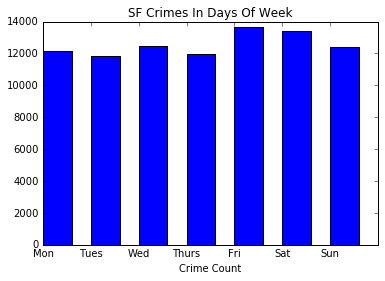

In [8]:
monday_crime = df[df.DayOfWeek == "Monday"]
tuesday_crime = df[df.DayOfWeek == "Tuesday"]
wednesday_crime = df[df.DayOfWeek == "Wednesday"]
thursday_crime = df[df.DayOfWeek == "Thursday"]
friday_crime = df[df.DayOfWeek == "Friday"]
saturday_crime = df[df.DayOfWeek == "Saturday"]
sunday_crime = df[df.DayOfWeek == "Sunday"]

print "Monday Crime Count {}".format(len(monday_crime))
print "Tuesday Crime Count {}".format(len(tuesday_crime))
print "Wednesday Crime Count {}".format(len(wednesday_crime))
print "Thursday Crime Count {}".format(len(thursday_crime))
print "Friday Crime Count {}".format(len(friday_crime))
print "Saturday Crime Count {}".format(len(saturday_crime))
print"Sunday Crime Count {}".format(len(sunday_crime))

days = ["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"]
crimes = [
    len(monday_crime),
    len(tuesday_crime),
    len(wednesday_crime),
    len(thursday_crime),
    len(friday_crime),
    len(saturday_crime),
    len(sunday_crime)
]

plt.bar(np.arange(7), crimes, width=.6, tick_label=days)
plt.xlabel("Crime Count")
plt.title("SF Crimes In Days Of Week")


It looks like the crime counts are evenly distributed during the days of week, with slightly more crimes happening on Friday and Saturday. A possible reason is more people go out during the weekends.

We did not really find any insights from the graph above, let's see if it makes a difference by segmenting the crimes by hours and days/hours.

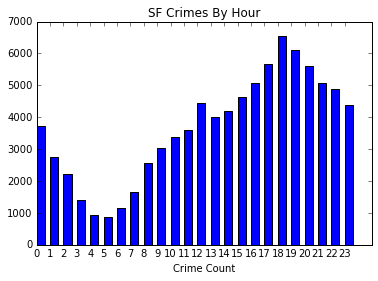

In [9]:
df.Hour = df.Dates.apply(lambda date: int(date.split(" ")[1].split(":")[0]))
crimes_by_hour = [len(df[df.Hour == hour]) for hour in np.arange(24)]
plt.bar(np.arange(24), crimes_by_hour, width=.6, tick_label=np.arange(24))
plt.xlabel("Crime Count")
plt.title("SF Crimes By Hour")


The statistics agrees with the traditional wisdom that there are more crimes when it is dark, with most of the crimes happening between 6PM and 12AM. Surprisingly, there are the most number of crimes between 6 and 7 PM but not later in the night. Let's take a look at what happened in that hour.

In [10]:
crimes_between_six_and_seven_pm = df[df.Hour == 18]
crimes_between_six_and_seven_pm.groupby("Category").Category.value_counts().nlargest(5)

Category                    
LARCENY/THEFT  LARCENY/THEFT    3776
ASSAULT        ASSAULT           796
VEHICLE THEFT  VEHICLE THEFT     697
DRUG/NARCOTIC  DRUG/NARCOTIC     480
BURGLARY       BURGLARY          461
dtype: int64

# Running the selected ML models

We are going to try predicting the crimes with naive Bayes classifier, logistic regression and decision tree classifier.

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.cross_validation import train_test_split
from sklearn.metrics import f1_score

from IPython.display import display

def round_minutes(minutes):
    rounded = int(round(minutes / 10.0)) * 10
    if rounded == 60:
        rounded = 0
    return rounded

def transform_day_of_week(day_of_week):
    days_dict = dict(Monday=1, Tuesday=2, Wednesday=3, Thursday=4, Friday=5, Saturday=6, Sunday=7)
    return days_dict[day_of_week]

def transform_pd_district(pd_district):
    district_dict = dict(SOUTHERN=1, NORTHERN=2, MISSION=3, CENTRAL=4, TENDERLOIN=5, BAYVIEW=6, INGLESIDE=7, TARAVAL=8, PARK=9, RICHMOND=10)
    return district_dict[pd_district]
    
X = df.drop(["Category", "Descript", "Resolution", "X", "Y"], axis=1)

X["Year"] = X.Dates.apply(lambda date: int(date.split(" ")[0].split("-")[0]))
X["Month"] = X.Dates.apply(lambda date: int(date.split(" ")[0].split("-")[1]))
X["Day"] = X.Dates.apply(lambda date: int(date.split(" ")[0].split("-")[2]))
X["Hour"] = X.Dates.apply(lambda date: int(date.split(" ")[1].split(":")[0]))
X["Minute"] = X.Dates.apply(lambda date: round_minutes(int(date.split(" ")[1].split(":")[1])))

X["DayOfWeek"] = X.DayOfWeek.apply(lambda day_of_week: transform_day_of_week(day_of_week))
X["PdDistrict"] = X.PdDistrict.apply(lambda district: transform_pd_district(district))
X["IsIntersection"] = X.Address.apply(lambda address: 1 if "/" in address else 0)

X = X.drop(["Dates", "Address"], axis=1)

results = []

for test_size in np.arange(0.1, 1, 0.1):
    X_train, X_test, y_train, y_test = train_test_split(X, df.Category, test_size=test_size, random_state=42)

    for clf in [
        DecisionTreeClassifier(random_state=42),
        LogisticRegression(random_state=42),
        GaussianNB()
    ]:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        score = f1_score(y_test, y_pred, average="micro")
        results.append([clf.__class__.__name__, test_size, score])
    
classifiers_results_df = pd.DataFrame(columns=["Classifier", "Test Size", "Score"], data=results)
classifiers_results_df.sort(["Classifier", "Test Size"], inplace=True)

display(classifiers_results_df)

Classifier  Test Size     Score
0   DecisionTreeClassifier        0.1  0.445190
3   DecisionTreeClassifier        0.2  0.439700
6   DecisionTreeClassifier        0.3  0.426914
9   DecisionTreeClassifier        0.4  0.419685
12  DecisionTreeClassifier        0.5  0.412014
15  DecisionTreeClassifier        0.6  0.401365
18  DecisionTreeClassifier        0.7  0.386864
21  DecisionTreeClassifier        0.8  0.372482
24  DecisionTreeClassifier        0.9  0.364721
2               GaussianNB        0.1  0.483284
5               GaussianNB        0.2  0.484960
8               GaussianNB        0.3  0.483738
11              GaussianNB        0.4  0.480298
14              GaussianNB        0.5  0.479132
17              GaussianNB        0.6  0.478393
20              GaussianNB        0.7  0.486045
23              GaussianNB        0.8  0.492843
26              GaussianNB        0.9  0.495110
1       LogisticRegression        0.1  0.510575
4       LogisticRegression        0.2  0.512708
7       LogisticRegression        0.3  0.511296
10      LogisticRegression        0.4  0.507847
13      LogisticRegression        0.5  0.507744
16      LogisticRegression        0.6  0.506785
19      LogisticRegression        0.7  0.506320
22      LogisticRegression        0.8  0.506489
25      LogisticRegression        0.9  0.506495

In [17]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.cross_validation import StratifiedShuffleSplit

cv = StratifiedShuffleSplit(y_train, n_iter=10, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=42, n_jobs=-1)
params = {
    "C": [0.1, 1, 10, 100, 1000]
}
scoring_fnc = make_scorer(f1_score, average="micro")
grid_obj = GridSearchCV(clf, param_grid=params, cv=cv, scoring=scoring_fnc)
grid_obj = grid_obj.fit(X_train, y_train)
clf = grid_obj.best_estimator_

X_train, X_test, y_train, y_test = train_test_split(X, df.Category, test_size=0.2, random_state=42)

print "The tuned model's F1 score is {}".format(f1_score(clf.predict(X_train), y_train))
print "The tuned model's F1 score is {}".format(f1_score(clf.predict(X_test), y_test))

/Users/dominicwong/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Users/dominicwong/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


The tuned model's F1 score is 0.666063985148
The tuned model's F1 score is 0.672941894224


/Users/dominicwong/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


In [24]:
clf.predict_proba(X_train)

array([[  1.64316220e-01,   1.69620280e-01,   6.74632565e-02, ...,
          3.43151668e-02,   3.06608087e-02,   2.24340952e-02],
       [  1.45182409e-01,   1.79673243e-01,   2.46905499e-02, ...,
          2.15763388e-02,   1.60747327e-01,   1.33651349e-02],
       [  8.78165910e-02,   6.04630128e-09,   1.55050534e-01, ...,
          7.23139377e-02,   1.26932541e-01,   2.96530304e-02],
       ..., 
       [  1.21571391e-01,   4.99289800e-01,   2.36971440e-02, ...,
          2.07776204e-02,   8.81869503e-02,   1.07887278e-02],
       [  7.11537992e-02,   2.85019118e-09,   4.91070259e-02, ...,
          5.55696975e-02,   9.82079652e-02,   1.63395814e-02],
       [  9.78432193e-02,   4.04401126e-09,   8.50309294e-02, ...,
          7.70784783e-02,   9.81913269e-02,   2.12905011e-02]])